# Image Classification Model using Neural Networks
## from freeCodeCamp TF 2.0 crash course

### How to la an look at data

In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
data = keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels) = data.load_data()

In [ ]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']

In [17]:
#print(train_images[7])

In [18]:
train_images = train_images/255.0
test_images = test_images/255.0

In [19]:
#print(train_images[7])

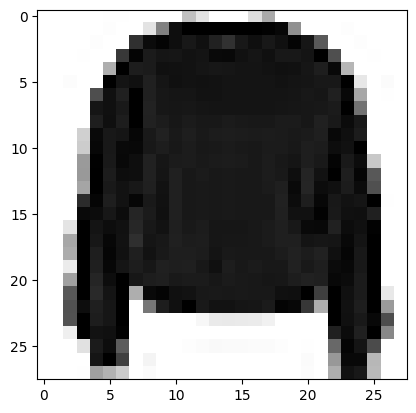

In [21]:
plt.imshow(train_images[7],cmap=plt.cm.binary)
plt.show()

In [23]:
train_images.shape #28 by 28 pixels

(60000, 28, 28)

In [27]:
train_labels.shape

(60000,)

In [30]:
### How to create a model

In [49]:
model = keras.Sequential([
     keras.layers.Flatten(input_shape=(28,28)),
     keras.layers.Dense(128, activation="relu"),
     keras.layers.Dense(10, activation="softmax")
    ])

model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5021 - accuracy: 0.8234
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3765 - accuracy: 0.8647
Epoch 3/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3363 - accuracy: 0.8773
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3142 - accuracy: 0.8852
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2956 - accuracy: 0.8928
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2842 - accuracy: 0.8959
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2688 - accuracy: 0.9001
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2608 - accuracy: 0.9030
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2500 - accuracy: 0.9067
Epoch 10/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.242

In [50]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print("Tested acc", test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.3534 - accuracy: 0.8783
Tested acc 0.8783000111579895


In [51]:
prediction = model.predict(test_images)
print(prediction)

313/313 [==============================] - 1s 2ms/step
[[1.60866264e-07 2.15046427e-12 2.55339891e-08 ... 5.17968684e-02
  8.68614097e-06 9.47989881e-01]
 [2.16324497e-05 1.56667248e-14 9.99868155e-01 ... 1.06109480e-15
  1.97976639e-12 2.48881421e-14]
 [9.51805212e-09 9.99999940e-01 2.82975560e-10 ... 3.30843796e-22
  3.05814702e-15 6.25987992e-20]
 ...
 [5.08396124e-06 2.77030569e-12 1.71316369e-05 ... 1.91758805e-12
  9.99966562e-01 3.66328118e-16]
 [6.46883052e-07 9.99921978e-01 1.02454555e-06 ... 4.99113688e-16
  4.51394921e-10 4.81310236e-09]
 [2.28736699e-05 1.48803955e-10 5.44165323e-06 ... 1.65597983e-02
  2.25993921e-04 1.01896665e-04]]


In [58]:
np.argmax(prediction[0])
class_names[np.argmax(prediction[0])]

'Ankle boot'

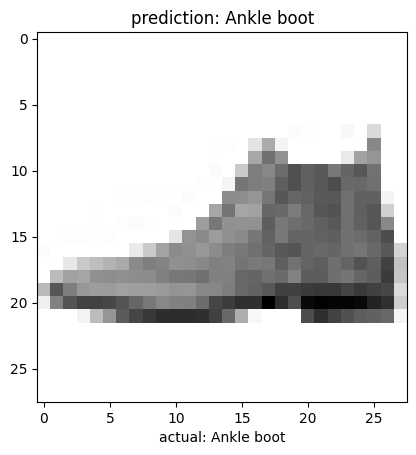

In [62]:
for i in range(1):
  plt.grid(False)
  plt.imshow(test_images[i],cmap=plt.cm.binary)
  plt.xlabel("actual: "+ class_names[test_labels[i]])
  plt.title("prediction: "+ class_names[np.argmax(prediction[i])])
  plt.show()